**STARTUP INVESTMENT**
*Venture deals, organizations, people and exits*

**PROBLEM DEFINITION**
> Tracking and analyzing investment trends over time

**DATA**
> This data is downloaded from kaggle notebook with the url
  https://www.kaggle.com/justinas/startup-investments
  
**CONTENT**
> This diverse dataset contains information about the startup ecosystem: organizations, individuals, company news, funding rounds, acquisitions, and IPOs.

> There are 11 tables that can be joined using unique IDs (schema to follow). More information about the individual data variables can be found on the Crunchabse Data website (under the API Entities Types section).

> No extensive data quality check have been performed yet. The information is available up to December 2013.

> While Kaggle contains other datasets focused on startup investments, to the best of my knowledge, this dataset has not yet been published on the platform and is unique.

**AKNOWLEDGEMENT**
> This Crunchbase 2013 Snapshot © 2013 dataset is fully attributed to Crunchbase.

**EVALUATION**
> Time Series would be used to focast


**INSPIRATIONS**
> There are multiple avenues for exploration:
EDA of the startup ecosystem.
Tracking and analyzing investment trends over time
Clustering VC funds based on their existing investments.
Predicting which startup will proceed to raise further rounds / will get acquired / will file for an IPO.
Mapping the network of individuals involved in the startup ecosystem.

In [1]:
# Importing Libraries for Loading Dataset
import numpy as np
import pandas as pd

In [2]:
# Importing required libraries for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from io import StringIO


In [3]:
objects = pd.read_csv("../input/startup-investments/objects.csv", low_memory=False)
objects.head()

,id,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,founded_at,...,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at
0,c:1,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,...,2008-05-19,3,39750000.0,2010-09-05,2013-09-18,5,17,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00
1,c:10,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,NaN,...,NaN,0,0.0,NaN,NaN,0,6,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14
2,c:100,Company,100,NaN,There,there,/company/there,games_video,acquired,NaN,...,NaN,0,0.0,2003-02-01,2011-09-23,4,12,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48
3,c:10000,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,2008-07-26,...,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18
4,c:10001,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,2008-07-26,...,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18


In [4]:
objects.dtypes

id                      object
entity_type             object
entity_id                int64
parent_id               object
name                    object
normalized_name         object
permalink               object
category_code           object
status                  object
founded_at              object
closed_at               object
domain                  object
homepage_url            object
twitter_username        object
logo_url                object
logo_width               int64
logo_height              int64
short_description       object
description             object
overview                object
tag_list                object
country_code            object
state_code              object
city                    object
region                  object
first_investment_at     object
last_investment_at      object
investment_rounds        int64
invested_companies       int64
first_funding_at        object
last_funding_at         object
funding_rounds           int64
funding_

In [5]:
objects['entity_type'].value_counts()

Person          226708
Company         196553
Product          27738
FinancialOrg     11652
Name: entity_type, dtype: int64

In [6]:
objects['status'].value_counts()

operating      443663
acquired         9394
live             4349
closed           2773
ipo              1134
beta              780
development       226
private           219
alpha             113
Name: status, dtype: int64

In [7]:
# Rename id in objects.csv to founded_object_id
objects.rename(columns={'id':'funded_object_id'}, inplace=True)
objects.head()

,funded_object_id,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,founded_at,...,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at
0,c:1,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,...,2008-05-19,3,39750000.0,2010-09-05,2013-09-18,5,17,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00
1,c:10,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,NaN,...,NaN,0,0.0,NaN,NaN,0,6,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14
2,c:100,Company,100,NaN,There,there,/company/there,games_video,acquired,NaN,...,NaN,0,0.0,2003-02-01,2011-09-23,4,12,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48
3,c:10000,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,2008-07-26,...,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18
4,c:10001,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,2008-07-26,...,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18


In [8]:
objects.drop(["created_at","updated_at", "logo_url", "logo_width","overview", "entity_id","parent_id","normalized_name", "logo_height","short_description", "created_at", "updated_at", "twitter_username","relationships", "domain", "homepage_url", "overview", "tag_list","city", "region", "state_code"], axis="columns", inplace=True)
objects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462651 entries, 0 to 462650
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   funded_object_id     462651 non-null  object 
 1   entity_type          462651 non-null  object 
 2   name                 462649 non-null  object 
 3   permalink            462651 non-null  object 
 4   category_code        123186 non-null  object 
 5   status               462651 non-null  object 
 6   founded_at           100441 non-null  object 
 7   closed_at            2809 non-null    object 
 8   description          95005 non-null   object 
 9   country_code         95043 non-null   object 
 10  first_investment_at  16956 non-null   object 
 11  last_investment_at   16956 non-null   object 
 12  investment_rounds    462651 non-null  int64  
 13  invested_companies   462651 non-null  int64  
 14  first_funding_at     31507 non-null   object 
 15  last_funding_at  

In [9]:
objects['category_code'].value_counts()

software            17922
web                 15118
other               13617
ecommerce            9065
games_video          7520
mobile               6862
advertising          6098
consulting           5006
enterprise           4441
biotech              4430
hardware             2951
education            2901
public_relations     2846
network_hosting      2350
search               2182
cleantech            1940
health               1698
finance              1386
social               1310
security             1171
medical              1153
analytics            1022
legal                1012
travel                936
local                 785
hospitality           768
news                  768
semiconductor         696
manufacturing         680
sports                675
music                 581
fashion               563
photo_video           544
transportation        489
real_estate           474
messaging             296
automotive            291
design                281
nonprofit   

In [10]:
objects['country_code'].value_counts()

USA    55584
GBR     7957
IND     4057
CAN     4005
DEU     2157
       ...  
SYR        1
GIN        1
WSM        1
TJK        1
NRU        1
Name: country_code, Length: 177, dtype: int64

In [11]:
investments = pd.read_csv("../input/startup-investments/investments.csv")
investments.head()

,id,funding_round_id,funded_object_id,investor_object_id,created_at,updated_at
0,1,1,c:4,f:1,2007-07-04 04:52:57,2008-02-27 23:14:29
1,2,1,c:4,f:2,2007-07-04 04:52:57,2008-02-27 23:14:29
2,3,3,c:5,f:4,2007-05-27 06:09:10,2013-06-28 20:07:23
3,4,4,c:5,f:1,2007-05-27 06:09:36,2013-06-28 20:07:24
4,5,4,c:5,f:5,2007-05-27 06:09:36,2013-06-28 20:07:24


In [12]:
investments['funded_object_id'].value_counts()

c:28535     58
c:169876    58
c:32499     54
c:6460      53
c:16284     49
            ..
c:234857     1
c:268458     1
c:38412      1
c:41967      1
c:30275      1
Name: funded_object_id, Length: 21607, dtype: int64

In [13]:
# Loading and merging the required dataset

df = investments.merge(objects, on='funded_object_id')
df.head()

,id,funding_round_id,funded_object_id,investor_object_id,created_at,updated_at,entity_type,name,permalink,category_code,...,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,created_by
0,1,1,c:4,f:1,2007-07-04 04:52:57,2008-02-27 23:14:29,Company,Digg,/company/digg,news,...,0,0,2005-10-01,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,initial-importer
1,2,1,c:4,f:2,2007-07-04 04:52:57,2008-02-27 23:14:29,Company,Digg,/company/digg,news,...,0,0,2005-10-01,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,initial-importer
2,144,85,c:4,f:1,2007-07-04 04:56:09,2008-02-27 23:14:29,Company,Digg,/company/digg,news,...,0,0,2005-10-01,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,initial-importer
3,145,85,c:4,f:2,2007-07-04 04:56:09,2008-02-27 23:14:29,Company,Digg,/company/digg,news,...,0,0,2005-10-01,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,initial-importer
4,146,85,c:4,f:4850,2007-07-04 04:56:09,2008-02-27 23:14:29,Company,Digg,/company/digg,news,...,0,0,2005-10-01,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,initial-importer


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80570 entries, 0 to 80569
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   80570 non-null  int64  
 1   funding_round_id     80570 non-null  int64  
 2   funded_object_id     80570 non-null  object 
 3   investor_object_id   80570 non-null  object 
 4   created_at           80570 non-null  object 
 5   updated_at           80570 non-null  object 
 6   entity_type          80570 non-null  object 
 7   name                 80570 non-null  object 
 8   permalink            80570 non-null  object 
 9   category_code        78704 non-null  object 
 10  status               80570 non-null  object 
 11  founded_at           68590 non-null  object 
 12  closed_at            4014 non-null   object 
 13  description          58321 non-null  object 
 14  country_code         77875 non-null  object 
 15  first_investment_at  921 non-null   

In [15]:
df['status'].value_counts()

operating    63268
acquired     11594
closed        3894
ipo           1814
Name: status, dtype: int64

In [16]:
df.drop(["closed_at", "first_investment_at","invested_companies", "investment_rounds", "created_at", "updated_at"], axis="columns", inplace= True)

In [17]:
df.tail()

,id,funding_round_id,funded_object_id,investor_object_id,entity_type,name,permalink,category_code,status,founded_at,...,country_code,last_investment_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,created_by
80565,80891,57805,c:285592,p:189455,Company,Chippmunk,/company/chippmunk,ecommerce,operating,2013-09-19,...,USA,NaN,2013-12-11,2013-12-11,1,750000.0,2013-09-19,2013-09-19,1,chippmunk
80566,80899,57912,c:60389,p:268570,Company,ROCKETHOME,/company/rockethome,cleantech,operating,2010-06-01,...,DEU,NaN,2013-07-10,2013-07-10,1,0.0,2013-04-01,2013-07-10,2,NaN
80567,80900,57929,c:286183,p:365,Company,Wedding Spot,/company/wedding-spot,web,operating,2013-05-01,...,USA,NaN,2013-12-12,2013-12-12,1,225000.0,NaN,NaN,0,ramesh2013
80568,80901,57929,c:286183,p:176466,Company,Wedding Spot,/company/wedding-spot,web,operating,2013-05-01,...,USA,NaN,2013-12-12,2013-12-12,1,225000.0,NaN,NaN,0,ramesh2013
80569,80902,57929,c:286183,p:268577,Company,Wedding Spot,/company/wedding-spot,web,operating,2013-05-01,...,USA,NaN,2013-12-12,2013-12-12,1,225000.0,NaN,NaN,0,ramesh2013


In [18]:
df['funded_object_id'].value_counts()

c:28535     58
c:169876    58
c:32499     54
c:6460      53
c:16284     49
            ..
c:38593      1
c:35561      1
c:20312      1
c:234198     1
c:80840      1
Name: funded_object_id, Length: 21485, dtype: int64

In [19]:
A = pd.read_csv("../input/startup-investments/funding_rounds.csv")
A.head()

,id,funding_round_id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,raised_amount,raised_currency_code,pre_money_valuation_usd,...,post_money_valuation,post_money_currency_code,participants,is_first_round,is_last_round,source_url,source_description,created_by,created_at,updated_at
0,1,1,c:4,2006-12-01,series-b,b,8500000.0,8500000.0,USD,0.0,...,0.0,NaN,2,0,0,http://www.marketingvox.com/archives/2006/12/2...,NaN,initial-importer,2007-07-04 04:52:57,2008-02-27 23:14:29
1,2,2,c:5,2004-09-01,angel,angel,500000.0,500000.0,USD,0.0,...,0.0,USD,2,0,1,NaN,NaN,initial-importer,2007-05-27 06:08:18,2013-06-28 20:07:23
2,3,3,c:5,2005-05-01,series-a,a,12700000.0,12700000.0,USD,115000000.0,...,0.0,USD,3,0,0,http://www.techcrunch.com/2007/11/02/jim-breye...,Jim Breyer: Extra $500 Million Round For Faceb...,initial-importer,2007-05-27 06:09:10,2013-06-28 20:07:23
3,4,4,c:5,2006-04-01,series-b,b,27500000.0,27500000.0,USD,525000000.0,...,0.0,USD,4,0,0,http://www.facebook.com/press/info.php?factsheet,Facebook Funding,initial-importer,2007-05-27 06:09:36,2013-06-28 20:07:24
4,5,5,c:7299,2006-05-01,series-b,b,10500000.0,10500000.0,USD,0.0,...,0.0,NaN,2,0,0,http://www.techcrunch.com/2006/05/14/photobuck...,PhotoBucket Closes $10.5M From Trinity Ventures,initial-importer,2007-05-29 11:05:59,2008-04-16 17:09:12


In [20]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52928 entries, 0 to 52927
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        52928 non-null  int64  
 1   funding_round_id          52928 non-null  int64  
 2   object_id                 52928 non-null  object 
 3   funded_at                 52680 non-null  object 
 4   funding_round_type        52928 non-null  object 
 5   funding_round_code        52928 non-null  object 
 6   raised_amount_usd         52928 non-null  float64
 7   raised_amount             52928 non-null  float64
 8   raised_currency_code      49862 non-null  object 
 9   pre_money_valuation_usd   52928 non-null  float64
 10  pre_money_valuation       52928 non-null  float64
 11  pre_money_currency_code   26883 non-null  object 
 12  post_money_valuation_usd  52928 non-null  float64
 13  post_money_valuation      52928 non-null  float64
 14  post_m

In [21]:
A.drop(['id', 'funding_round_id', 'funding_round_code', 'raised_amount', 'raised_currency_code', 'pre_money_valuation_usd', 'pre_money_valuation', 'pre_money_currency_code', 'post_money_valuation_usd', 'post_money_currency_code', 'participants', 'is_first_round', 'is_last_round', 'source_url', 'source_description', 'created_by', 'updated_at', 'created_at'], axis='columns', inplace=True)

In [22]:
A.drop(['post_money_valuation'], axis='columns', inplace=True)

In [23]:
A.rename(columns={'object_id':'funded_object_id'}, inplace=True)
A.head()

,funded_object_id,funded_at,funding_round_type,raised_amount_usd
0,c:4,2006-12-01,series-b,8500000.0
1,c:5,2004-09-01,angel,500000.0
2,c:5,2005-05-01,series-a,12700000.0
3,c:5,2006-04-01,series-b,27500000.0
4,c:7299,2006-05-01,series-b,10500000.0


In [24]:
df2 = df.merge(A, on='funded_object_id')
df2.head()

,id,funding_round_id,funded_object_id,investor_object_id,entity_type,name,permalink,category_code,status,founded_at,...,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,created_by,funded_at,funding_round_type,raised_amount_usd
0,1,1,c:4,f:1,Company,Digg,/company/digg,news,acquired,2004-10-11,...,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,initial-importer,2006-12-01,series-b,8500000.0
1,1,1,c:4,f:1,Company,Digg,/company/digg,news,acquired,2004-10-11,...,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,initial-importer,2005-10-01,series-a,2800000.0
2,1,1,c:4,f:1,Company,Digg,/company/digg,news,acquired,2004-10-11,...,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,initial-importer,2008-09-24,series-c+,28700000.0
3,1,1,c:4,f:1,Company,Digg,/company/digg,news,acquired,2004-10-11,...,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,initial-importer,2011-07-12,series-c+,5000000.0
4,2,1,c:4,f:2,Company,Digg,/company/digg,news,acquired,2004-10-11,...,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,initial-importer,2006-12-01,series-b,8500000.0


In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223898 entries, 0 to 223897
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  223898 non-null  int64  
 1   funding_round_id    223898 non-null  int64  
 2   funded_object_id    223898 non-null  object 
 3   investor_object_id  223898 non-null  object 
 4   entity_type         223898 non-null  object 
 5   name                223898 non-null  object 
 6   permalink           223898 non-null  object 
 7   category_code       221193 non-null  object 
 8   status              223898 non-null  object 
 9   founded_at          202601 non-null  object 
 10  description         175292 non-null  object 
 11  country_code        220161 non-null  object 
 12  last_investment_at  3185 non-null    object 
 13  first_funding_at    223811 non-null  object 
 14  last_funding_at     223811 non-null  object 
 15  funding_rounds      223898 non-nul

In [26]:
len(df2)

223898

In [27]:
df2.isna().sum()

id                         0
funding_round_id           0
funded_object_id           0
investor_object_id         0
entity_type                0
name                       0
permalink                  0
category_code           2705
status                     0
founded_at             21297
description            48606
country_code            3737
last_investment_at    220713
first_funding_at          87
last_funding_at           87
funding_rounds             0
funding_total_usd          0
first_milestone_at     41500
last_milestone_at      41500
milestones                 0
created_by             36454
funded_at                229
funding_round_type         0
raised_amount_usd          0
dtype: int64

In [28]:
# Check in percentage the missing data
# summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(df2.isnull().sum()/len(df2.index)), 2)

id                     0.00
funding_round_id       0.00
funded_object_id       0.00
investor_object_id     0.00
entity_type            0.00
name                   0.00
permalink              0.00
category_code          1.21
status                 0.00
founded_at             9.51
description           21.71
country_code           1.67
last_investment_at    98.58
first_funding_at       0.04
last_funding_at        0.04
funding_rounds         0.00
funding_total_usd      0.00
first_milestone_at    18.54
last_milestone_at     18.54
milestones             0.00
created_by            16.28
funded_at              0.10
funding_round_type     0.00
raised_amount_usd      0.00
dtype: float64

In [29]:
df2.drop(['created_by', 'first_milestone_at', 'last_milestone_at', 'last_investment_at'], axis='columns', inplace=True)

In [30]:
df2.head()

,id,funding_round_id,funded_object_id,investor_object_id,entity_type,name,permalink,category_code,status,founded_at,description,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,milestones,funded_at,funding_round_type,raised_amount_usd
0,1,1,c:4,f:1,Company,Digg,/company/digg,news,acquired,2004-10-11,user driven social content website,USA,2005-10-01,2011-07-12,4,45000000.0,8,2006-12-01,series-b,8500000.0
1,1,1,c:4,f:1,Company,Digg,/company/digg,news,acquired,2004-10-11,user driven social content website,USA,2005-10-01,2011-07-12,4,45000000.0,8,2005-10-01,series-a,2800000.0
2,1,1,c:4,f:1,Company,Digg,/company/digg,news,acquired,2004-10-11,user driven social content website,USA,2005-10-01,2011-07-12,4,45000000.0,8,2008-09-24,series-c+,28700000.0
3,1,1,c:4,f:1,Company,Digg,/company/digg,news,acquired,2004-10-11,user driven social content website,USA,2005-10-01,2011-07-12,4,45000000.0,8,2011-07-12,series-c+,5000000.0
4,2,1,c:4,f:2,Company,Digg,/company/digg,news,acquired,2004-10-11,user driven social content website,USA,2005-10-01,2011-07-12,4,45000000.0,8,2006-12-01,series-b,8500000.0


In [31]:
df2['category_code'].value_counts()

software            28216
biotech             24386
enterprise          18361
mobile              17528
web                 16203
advertising         13320
ecommerce           10960
cleantech            9866
analytics            7642
games_video          7439
semiconductor        7249
hardware             6989
medical              6169
network_hosting      4718
social               4226
finance              4173
security             3908
education            2991
health               2552
search               2462
messaging            1936
other                1816
public_relations     1703
news                 1682
manufacturing        1604
fashion              1496
travel               1411
music                1384
nanotech             1277
hospitality          1229
automotive            997
consulting            973
transportation        928
photo_video           881
real_estate           800
sports                477
nonprofit             357
design                296
legal       

In [32]:
# Check in percentage the missing data
# summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(df2.isnull().sum()/len(df2.index)), 2)

id                     0.00
funding_round_id       0.00
funded_object_id       0.00
investor_object_id     0.00
entity_type            0.00
name                   0.00
permalink              0.00
category_code          1.21
status                 0.00
founded_at             9.51
description           21.71
country_code           1.67
first_funding_at       0.04
last_funding_at        0.04
funding_rounds         0.00
funding_total_usd      0.00
milestones             0.00
funded_at              0.10
funding_round_type     0.00
raised_amount_usd      0.00
dtype: float64

In [33]:
#Dropping rows based on null columns
df2 = df2[~(df2['country_code'].isnull() | df2['description'].isnull() | df2['funded_at'].isnull() | df2['founded_at'].isnull())]

In [34]:
df2.isna().sum()

id                      0
funding_round_id        0
funded_object_id        0
investor_object_id      0
entity_type             0
name                    0
permalink               0
category_code         269
status                  0
founded_at              0
description             0
country_code            0
first_funding_at        0
last_funding_at         0
funding_rounds          0
funding_total_usd       0
milestones              0
funded_at               0
funding_round_type      0
raised_amount_usd       0
dtype: int64

In [35]:
df2 = df2[~(df2['category_code'].isnull())]

In [36]:
df2.isna().sum()

id                    0
funding_round_id      0
funded_object_id      0
investor_object_id    0
entity_type           0
name                  0
permalink             0
category_code         0
status                0
founded_at            0
description           0
country_code          0
first_funding_at      0
last_funding_at       0
funding_rounds        0
funding_total_usd     0
milestones            0
funded_at             0
funding_round_type    0
raised_amount_usd     0
dtype: int64

In [37]:
df2['status'].value_counts()

operating    128167
acquired      23269
ipo            6943
closed         4878
Name: status, dtype: int64

In [38]:
#Identify duplicates records in the data
dupes=df2.duplicated()
sum(dupes)

291

In [39]:
df2=df2.drop_duplicates()

In [40]:
#Identify duplicates records in the data
dupes2=df2.duplicated()
sum(dupes2)

0

# **LETS DO SOME ANALYSIS**

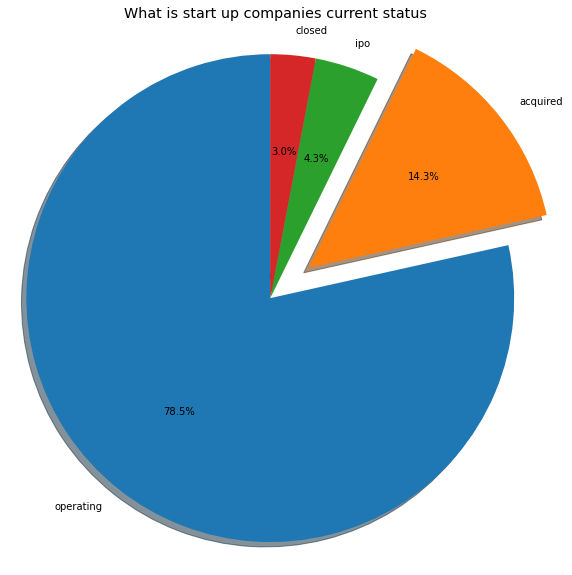

In [41]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.rcParams['figure.figsize'] = 10,10
labels = df2['status'].value_counts().index.tolist()
sizes = df2['status'].value_counts().tolist()
explode = (0, 0.2, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
plt.title("What is start up companies current status", fontdict=None, position= [0.48,1], size = 'x-large')

plt.show()

Most of company (78.5 %) in this dataset is operating,

and around 3.0 % company is already closed.

In [42]:
len(df['category_code'].unique())

43

In [43]:
df2['category_code'].value_counts()[:5]

software       21959
enterprise     16191
mobile         14200
web            12447
advertising    11518
Name: category_code, dtype: int64

because we have around 43 categories of start up,

Then just plot all   : )

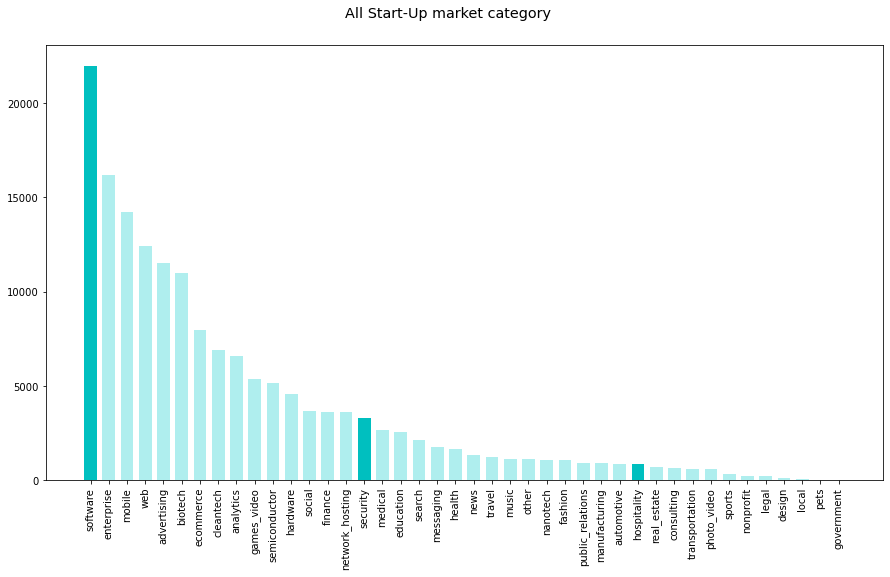

In [44]:
plt.rcParams['figure.figsize'] = 15,8

height = df2['category_code'].value_counts()[:45].tolist()
bars =  df2['category_code'].value_counts()[:45].index.tolist()
y_pos = np.arange(len(bars))
plt.bar(y_pos, height , width=0.7 ,color= ['c']+['paleturquoise']*14)
plt.xticks(y_pos, bars)
plt.xticks(rotation=90)
plt.title("All Start-Up market category", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.show()

**Now lets look at the top 15 startup category market**

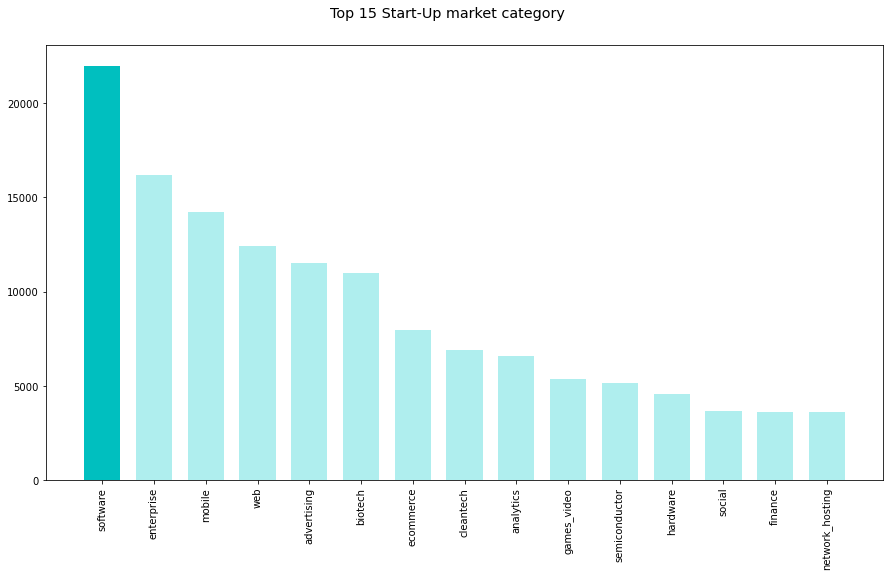

In [45]:
plt.rcParams['figure.figsize'] = 15,8

height = df2['category_code'].value_counts()[:15].tolist()
bars =  df2['category_code'].value_counts()[:15].index.tolist()
y_pos = np.arange(len(bars))
plt.bar(y_pos, height , width=0.7 ,color= ['c']+['paleturquoise']*14)
plt.xticks(y_pos, bars)
plt.xticks(rotation=90)
plt.title("Top 15 Start-Up market category", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.show()

Lets do something interesting

In [46]:
def count_word(df2, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split('|'):        
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue        
        for s in [s for s in liste_keywords if s in liste]: 
            if pd.notnull(s): keyword_count[s] += 1
    #______________________________________________________________________
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count


def makeCloud(Dict,name,color):
    words = dict()

    for s in Dict:
        words[s[0]] = s[1]

        wordcloud = WordCloud(width=1500, height=750, background_color=color, max_words=50, max_font_size=500, normalize_plurals=False)
        wordcloud.generate_from_frequencies(words)


    fig = plt.figure(figsize=(12, 8))
    plt.title(name)
    plt.imshow(wordcloud)
    plt.axis('off')

    plt.show()

In [47]:
set_keywords = set()
for liste_keywords in df['category_code'].str.split('|').values:
    if isinstance(liste_keywords, float): continue  # only happen if liste_keywords = NaN
    set_keywords = set_keywords.union(liste_keywords)
#_________________________


In [48]:
keyword_occurences, dum = count_word(df, 'category_code', set_keywords)

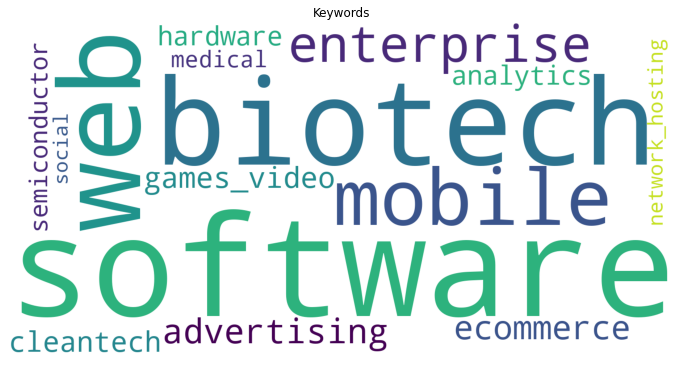

In [49]:
makeCloud(keyword_occurences[0:15],"Keywords","White")

The most popular category is still about Software, Biotech & Web,

It maybe because these 3 categories are easily to scalable ? 

In [50]:
df2.head()

,id,funding_round_id,funded_object_id,investor_object_id,entity_type,name,permalink,category_code,status,founded_at,description,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,milestones,funded_at,funding_round_type,raised_amount_usd
0,1,1,c:4,f:1,Company,Digg,/company/digg,news,acquired,2004-10-11,user driven social content website,USA,2005-10-01,2011-07-12,4,45000000.0,8,2006-12-01,series-b,8500000.0
1,1,1,c:4,f:1,Company,Digg,/company/digg,news,acquired,2004-10-11,user driven social content website,USA,2005-10-01,2011-07-12,4,45000000.0,8,2005-10-01,series-a,2800000.0
2,1,1,c:4,f:1,Company,Digg,/company/digg,news,acquired,2004-10-11,user driven social content website,USA,2005-10-01,2011-07-12,4,45000000.0,8,2008-09-24,series-c+,28700000.0
3,1,1,c:4,f:1,Company,Digg,/company/digg,news,acquired,2004-10-11,user driven social content website,USA,2005-10-01,2011-07-12,4,45000000.0,8,2011-07-12,series-c+,5000000.0
4,2,1,c:4,f:2,Company,Digg,/company/digg,news,acquired,2004-10-11,user driven social content website,USA,2005-10-01,2011-07-12,4,45000000.0,8,2006-12-01,series-b,8500000.0


**TOTAL FUNDING USD**

In [51]:
df2['raised_amount_usd'].head()

0     8500000.0
1     2800000.0
2    28700000.0
3     5000000.0
4     8500000.0
Name: raised_amount_usd, dtype: float64

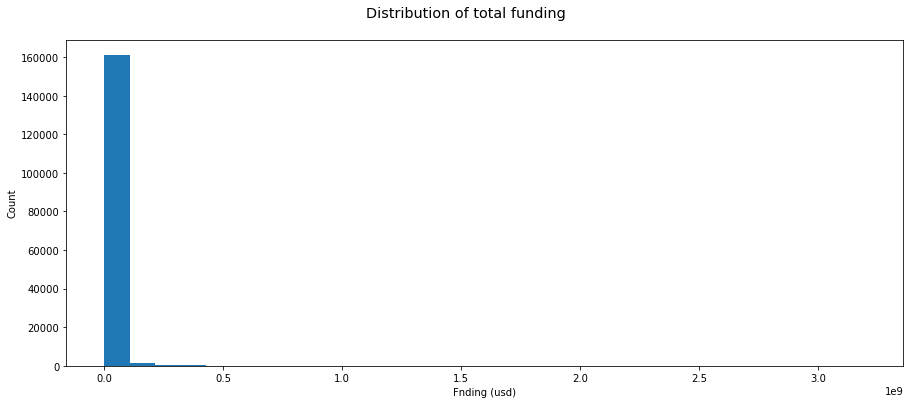

In [52]:
plt.rcParams['figure.figsize'] = 15,6
plt.hist(df2['raised_amount_usd'].dropna(), bins=30)
plt.ylabel('Count')
plt.xlabel('Fnding (usd)')
plt.title("Distribution of total funding ", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.show()

In [53]:
Q1 = df2['raised_amount_usd'].quantile(0.25)
Q3 = df2['raised_amount_usd'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = (Q1 - 1.5 * IQR)
upper_bound = (Q3 + 1.5 * IQR)

In [54]:
without_outlier = df2[(df2['raised_amount_usd'] > lower_bound ) & (df2['funding_total_usd'] < upper_bound)]

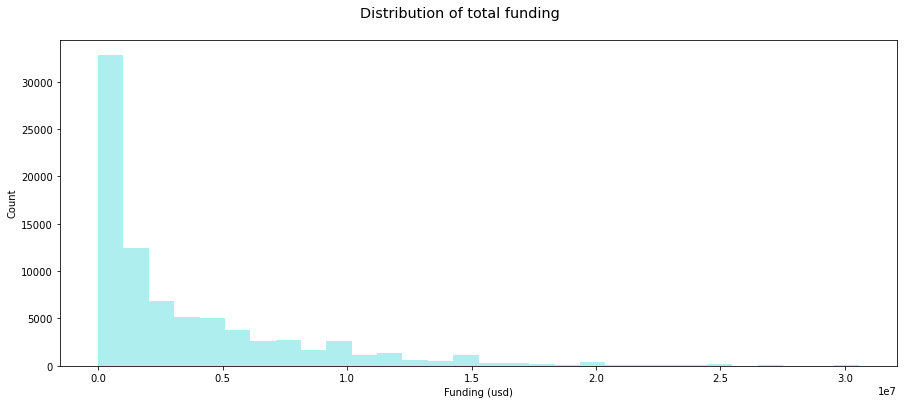

In [55]:
plt.rcParams['figure.figsize'] = 15,6
plt.hist(without_outlier['raised_amount_usd'].dropna(), bins=30,color = 'paleturquoise' )

plt.ylabel('Count')
plt.xlabel('Funding (usd)')
plt.title("Distribution of total funding ", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.show()

In [56]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162966 entries, 0 to 223894
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  162966 non-null  int64  
 1   funding_round_id    162966 non-null  int64  
 2   funded_object_id    162966 non-null  object 
 3   investor_object_id  162966 non-null  object 
 4   entity_type         162966 non-null  object 
 5   name                162966 non-null  object 
 6   permalink           162966 non-null  object 
 7   category_code       162966 non-null  object 
 8   status              162966 non-null  object 
 9   founded_at          162966 non-null  object 
 10  description         162966 non-null  object 
 11  country_code        162966 non-null  object 
 12  first_funding_at    162966 non-null  object 
 13  last_funding_at     162966 non-null  object 
 14  funding_rounds      162966 non-null  int64  
 15  funding_total_usd   162966 non-nul

In [57]:
df2.head()

,id,funding_round_id,funded_object_id,investor_object_id,entity_type,name,permalink,category_code,status,founded_at,description,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,milestones,funded_at,funding_round_type,raised_amount_usd
0,1,1,c:4,f:1,Company,Digg,/company/digg,news,acquired,2004-10-11,user driven social content website,USA,2005-10-01,2011-07-12,4,45000000.0,8,2006-12-01,series-b,8500000.0
1,1,1,c:4,f:1,Company,Digg,/company/digg,news,acquired,2004-10-11,user driven social content website,USA,2005-10-01,2011-07-12,4,45000000.0,8,2005-10-01,series-a,2800000.0
2,1,1,c:4,f:1,Company,Digg,/company/digg,news,acquired,2004-10-11,user driven social content website,USA,2005-10-01,2011-07-12,4,45000000.0,8,2008-09-24,series-c+,28700000.0
3,1,1,c:4,f:1,Company,Digg,/company/digg,news,acquired,2004-10-11,user driven social content website,USA,2005-10-01,2011-07-12,4,45000000.0,8,2011-07-12,series-c+,5000000.0
4,2,1,c:4,f:2,Company,Digg,/company/digg,news,acquired,2004-10-11,user driven social content website,USA,2005-10-01,2011-07-12,4,45000000.0,8,2006-12-01,series-b,8500000.0


In [58]:
df2['name'].value_counts()[:1000]

Aperto Networks          539
Practice Fusion          530
Aviir                    476
EndoGastric Solutions    462
Tesla Motors             374
                        ... 
BioNano Genomics          40
Vostu                     40
RatePoint                 40
Redux                     40
WhiteHat Security         40
Name: name, Length: 1000, dtype: int64

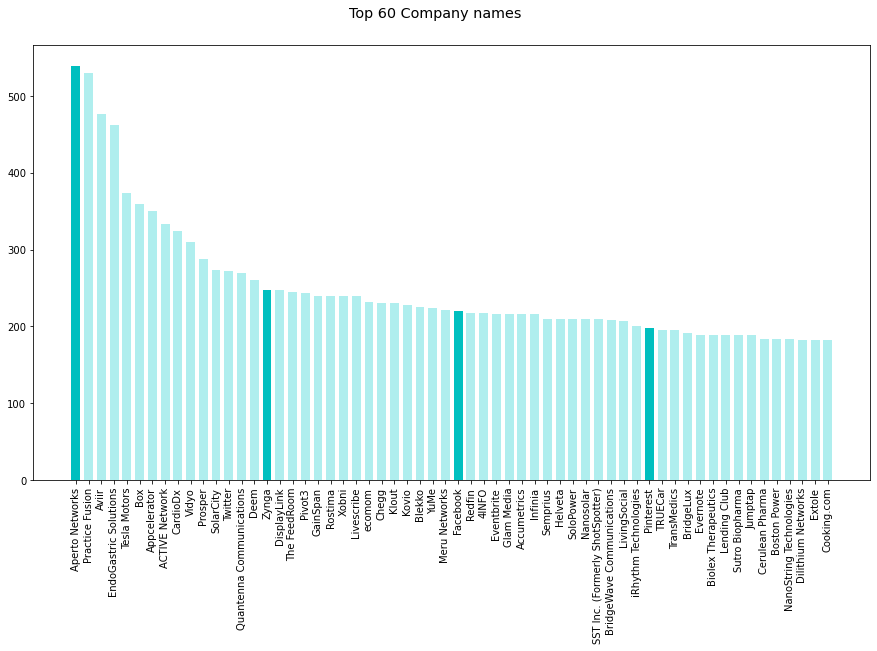

In [59]:
plt.rcParams['figure.figsize'] = 15,8

height = df2['name'].value_counts()[:60].tolist()
bars =  df2['name'].value_counts()[:60].index.tolist()
y_pos = np.arange(len(bars))
plt.bar(y_pos, height , width=0.7 ,color= ['c']+['paleturquoise']*14)
plt.xticks(y_pos, bars)
plt.xticks(rotation=90)
plt.title("Top 60 Company names", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.show()

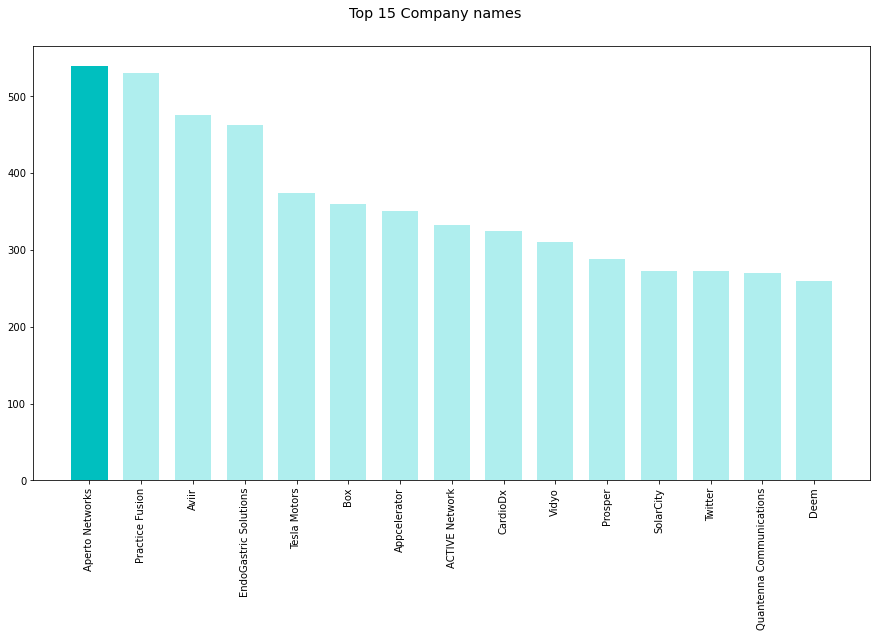

In [60]:
plt.rcParams['figure.figsize'] = 15,8

height = df2['name'].value_counts()[:15].tolist()
bars =  df2['name'].value_counts()[:15].index.tolist()
y_pos = np.arange(len(bars))
plt.bar(y_pos, height , width=0.7 ,color= ['c']+['paleturquoise']*14)
plt.xticks(y_pos, bars)
plt.xticks(rotation=90)
plt.title("Top 15 Company names", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.show()

In [61]:
df2['founded_at'] = pd.to_datetime(df2['founded_at'], errors = 'coerce' )

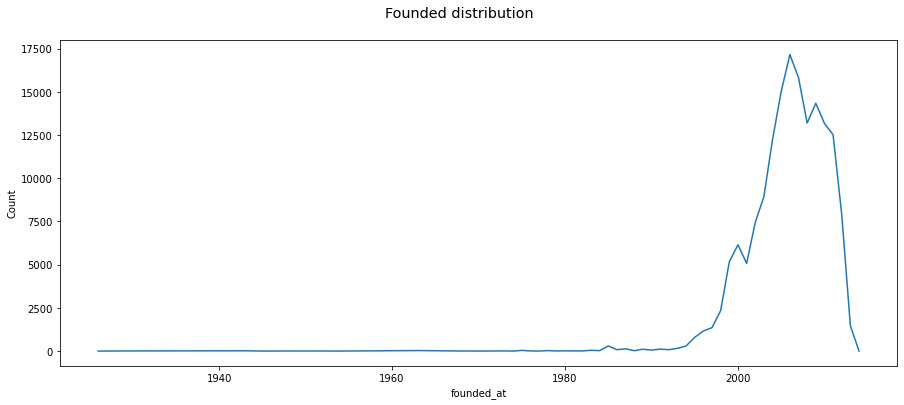

In [62]:
plt.rcParams['figure.figsize'] = 15,6
df2['name'].groupby(df2["founded_at"].dt.year).count().plot(kind="line")

plt.ylabel('Count')
plt.title("Founded distribution ", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.show()

In [63]:
Facebook_founded_year = df2['founded_at'][df2['name']=="Facebook"].dt.year
Twitter_founded_year  = df2['founded_at'][df2['name']=="Twitter"].dt.year
Pinterest_founded_year  = df2['founded_at'][df2['name']=="Pinterest"].dt.year

In [64]:
Facebook_founded_year

56     2004
57     2004
58     2004
59     2004
60     2004
       ... 
271    2004
272    2004
273    2004
274    2004
275    2004
Name: founded_at, Length: 220, dtype: int64

In [65]:
Twitter_founded_year

5737    2006
5738    2006
5739    2006
5740    2006
5741    2006
        ... 
6004    2006
6005    2006
6006    2006
6007    2006
6008    2006
Name: founded_at, Length: 272, dtype: int64

In [66]:
Pinterest_founded_year

168330    2009
168331    2009
168332    2009
168333    2009
168334    2009
          ... 
168523    2009
168524    2009
168525    2009
168526    2009
168527    2009
Name: founded_at, Length: 198, dtype: int64

 **Country Code**

In [67]:
len(df2['country_code'].unique())

94

We have 94 unique code in the dataset

In [68]:
df2['country_code'].value_counts()[:10]

USA    134986
GBR      6934
CAN      3246
DEU      2382
ISR      2022
FRA      1849
ESP      1165
IND      1085
CHN       858
IRL       773
Name: country_code, dtype: int64

Most of the companies came from USA

In [69]:
df2['count'] = 1
country_market = df2[['count','country_code','category_code']].groupby(['country_code','category_code']).agg({'count': 'sum'})
# Change: groupby state_office and divide by sum
country_market_pct = country_market.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
country_market_pct.reset_index(inplace = True)

In [70]:
USA_market_pct = country_market_pct[country_market_pct['country_code'] == "USA"]
USA_market_pct = USA_market_pct.sort_values('count',ascending = False)[0:10]

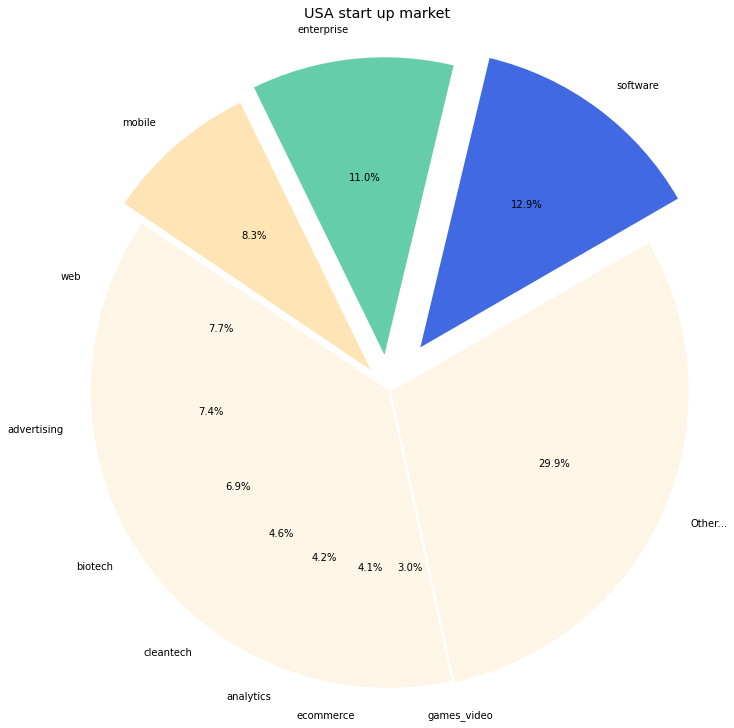

For USA, Most of start up market is about Software & Technology


In [71]:
## USA
plt.rcParams['figure.figsize'] =10,10
labels = list(USA_market_pct['category_code'])+['Other...']
sizes = list(USA_market_pct['count'])+[100-USA_market_pct['count'].sum()]
explode = (0.18, 0.12, 0.09,0,0,0,0,0,0,0,0.01)
colors =  ['royalblue','mediumaquamarine','moccasin'] +['oldlace']*8

plt.pie(sizes, explode = explode, colors = colors ,labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=30)
plt.axis('equal')
plt.tight_layout()
plt.title("USA start up market", fontdict=None, position= [0.48,1.1], size = 'x-large')

plt.show()
print('For USA, Most of start up market is about Software & Technology')

**Now let me check for my counry Nigeria**

In [72]:
NGA_market_pct = country_market_pct[country_market_pct['country_code'] == "NGA"]
NGA_market_pct = NGA_market_pct.sort_values('count',ascending = False)[0:10]

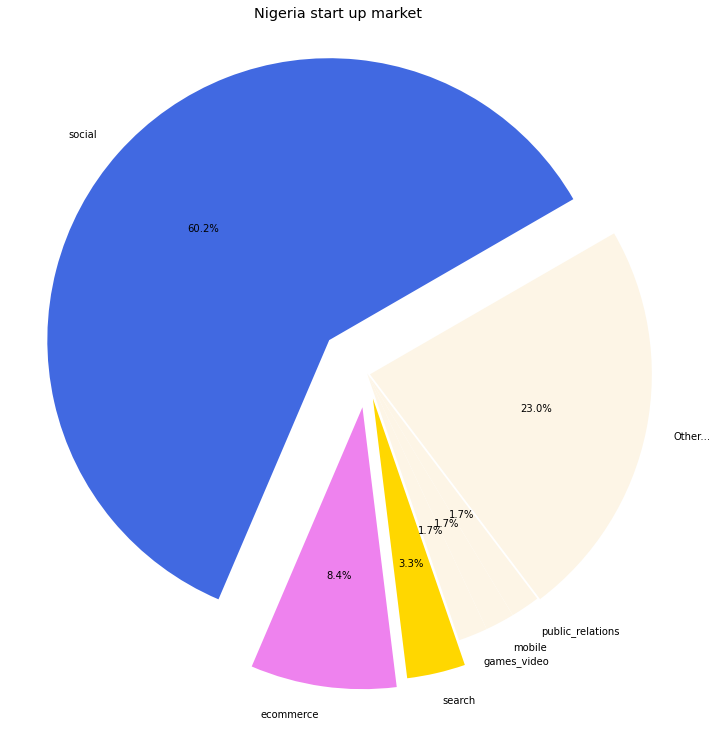

For NGA, Most of start up market is about Social mainly


In [73]:
plt.rcParams['figure.figsize'] = 10,10
labels = list(NGA_market_pct['category_code'])+['Other...']
sizes = list(NGA_market_pct['count'])+[100-USA_market_pct['count'].sum()]
Nones = (0.18, 0.12, 0.09,0,0,0,0.01)
colors =  ['royalblue','violet','gold'] +['oldlace']*8

plt.pie(sizes, explode = Nones, colors = colors ,labels=labels, autopct='%1.1f%%',shadow=False, startangle=30)
plt.axis('equal')
plt.tight_layout()
plt.title("Nigeria start up market", fontdict=None, position= [0.48,1.1], size = 'x-large')
plt.show()
print('For NGA, Most of start up market is about Social mainly')

these two pie charts show how different of interest trend between Nigeria and America 

In [74]:
def funding_information(data,name):
    company = data[data['name'] == name]
    print ("Company : ", name)
    print ("Total Funding : ", company.funding_total_usd.values[0] , " $")
    print ("Seed Funding : ", company.seed.values[0] , " $")
    print ("Angle Funding :", company.angel.values[0] , " $")
    print ("Grant Funding : ",company.grant.values[0] , " $")
    print ("Product Crowd Funding : ",company.product_crowdfunding.values[0] , " $")
    print ("Equity Crowd Funding : ",company.equity_crowdfunding.values[0] , " $")
    print ("Undisclode Funding : ", company.undisclosed.values[0] , " $")
    print ("Convertible Note : ", company.convertible_note.values[0] , " $")
    print ("Debt Financing : ", company.debt_financing.values[0] , " $")
    print ("Private Equity : ",company.private_equity.values[0] , " $")
    print ("PostIPO Equity : ",company.post_ipo_equity.values[0] , " $")
    print ("PostIPO Debt : ",company.post_ipo_debt.values[0] , " $")
    print ("Secondary Market : ",company.secondary_market.values[0] , " $")
    print ("Venture Funding : ",company.venture.values[0] , " $")
    print ("Round A funding : ",company.round_A.values[0] , " $")
    print ("Round B funding : ",company.round_B.values[0] , " $")
    print ("Round C funding : ",company.round_C.values[0] , " $")
    print ("Round D funding : ",company.round_D.values[0] , " $")
    print ("Round E funding : ",company.round_E.values[0] , " $")
    print ("Round F funding : ",company.round_F.values[0] , " $")
    print ("Round G funding : ",company.round_G.values[0] , " $")
    print ("Round H funding : ",company.round_H.values[0] , " $")


**Now lets check on Country and Total funding**